**Sabana SURESH (22103297)**

M1 MIAGE Initial

## Projet de Machine Learning : Bank Marketing Data Set : Predict the Success of Bank Telemarketing




In [ ]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE



 ## La description du problème et les objectifs de la solution à proposer

  - **Problème à résoudre**
  
  Le projet vise à prédire si un client souscrira ou non à un dépôt à terme suite à une campagne de télémarketing faite par une institution bancaire portugaise. Les campagnes de marketing sont effectuées par téléphone et un même client peut être contacter plusieurs fois avant d'obtenir une réponse favorable. L'objectif principal est d’identifier les caractéristiques des clients les plus susceptibles d’accepter l’offre, pour optimiser les efforts marketing et d’améliorer le taux de conversion.

  - **Type de problème : Classification ou Régression ?**

  Ce problème se traite comme un problème de classification binaire, car la variable cible (y) est de type binaire :

   – oui (yes) : le client a souscrit au dépôt à terme.
   
   – non (no) : le client n’a pas souscrit au dépôt à terme.

On utilise la classification car l'objectif est de prédire une catégorie ou une classe à partir d'un ensemble de caractéristiques. Dans ce type de problème, le modèle apprend à partir d'exemples étiquetés (notre base de données) pour faire des prédictions sur de nouvelles données non étiquetées.
La classification binaire est un sous-type de classification où il n'y a que deux classes possibles (ici yes et no). Cela permet de prendre des décisions basées sur deux résultats opposés, facilitant ainsi l'interprétation des résultats et la mise en œuvre de stratégies basées sur ces prédictions.

  - **Définition des features et de la variable cible**
  
  – Features :

- Données démographiques du client

 - age : âge du client (numérique)

 - job : profession du client (catégorique)

 - marital : statut matrimonial (catégorique: single, married, divorced)

 - education : niveau d’éducation (catégorique: primary, secondary, tertiary, unknown)

 - default : crédit en défaut (binaire: yes, no)

 - balance : solde bancaire moyen annuel (numérique)

 - housing : si le client a un prêt immobilier (binaire: yes, no)

 - loan : si le client a un prêt personnel (binaire: yes, no)

- Données liées à la dernière interaction marketing

 - contact : type de contact (binaire: telephone, cellular, unknown)

 - day : jour du dernier contact (numérique: entre 1 et 31)

 - month : mois du dernier contact

 - duration : durée de l’appel en secondes (numérique)

- Données sur la campagne marketing

 - campaign : nombre de contacts effectués lors de cette campagne (numérique)

 - pdays : nombre de jours depuis le dernier appel avec le client (numérique, -1 signifie que le client n'a jamais été contacté avant)

 - previous : nombre de contacts fait avant la campagne actuelle (numérique)

 - poutcome : résultat de la campagne précédente (catégorique: success, failure, other, unknown)

  – Variable cible : y (binaire : "yes" ou "no")

In [ ]:
# Chargement des données
data_path = "/content/sample_data/bank-full.csv"

In [ ]:
# Lecture du fichier CSV
data = pd.read_csv(data_path, sep=';')

# Aperçu des données
print("Aperçu des données :")
print(data.head())
print("\nStatistiques descriptives :")
print(data.describe())
print("\nInformations sur les données :")
print(data.info())



Aperçu des données :
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  

Statistiques descriptives :
                age        balance           day      duratio

## La description des données
Le jeu de données utilisé vient de la base UCI Machine Learning Repository et contient des informations sur des campagnes marketing menées entre mai 2008 et novembre 2010.

– Nombre total d’observations : 45 211

– Nombre total de variables : 16 (on ne compte pas la variable cible y)

On a plusieurs types de données.

– Variables numériques (ex: age, balance, duration, ...)

– Variables catégoriques (ex: job, marital, education, contact, ...)

– Variables binaires (ex: default, housing, loan, default, ...)

**Remarques:**
1. Nous avons dans les données, des valeurs "unknown" dans des variables comme "job" et "education". On va donc traitées ces données pour que le modèle reste pertinent. On peut les remplacer par une valeur appropriée ou les regroupes dans une catégorie.
2. Nous allons pas utiliser la variable "duration" pour faire nos prédiction car elle n'est connue qu'à la fin de l'appel. On peut l'utiliser pour analyser son impact mais pas pour le modèle prédictif.


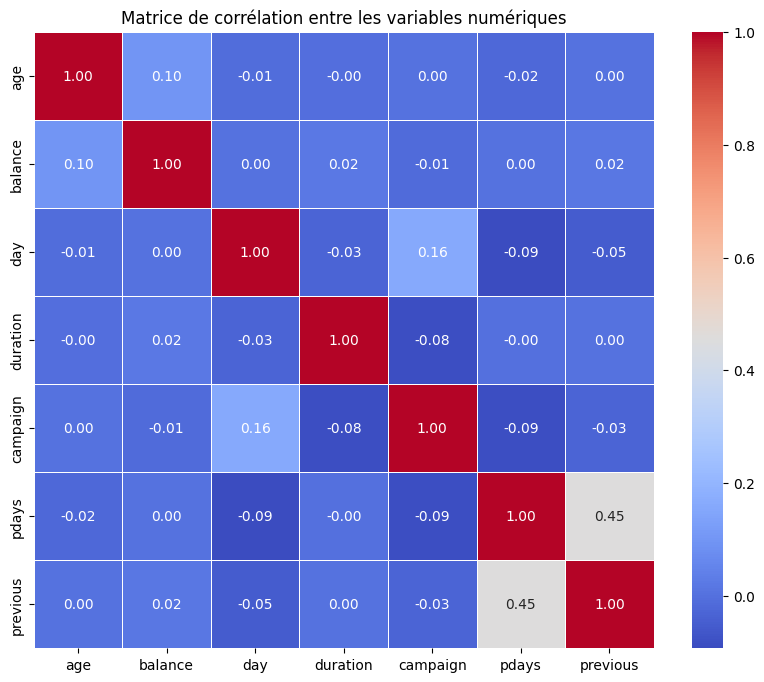

In [ ]:
# Assurer que seules des colonnes numériques sont utilisées pour la matrice de corrélation
numeric_data = data.select_dtypes(include=['number'])  # Sélectionner uniquement les colonnes numériques
corr_matrix = numeric_data.corr()  # Calculer la matrice de corrélation

# Tracer le heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matrice de corrélation entre les variables numériques")
plt.show()


## Explication de la matrice de corrélation
La matrice de corrélation montre comment les différentes variables numériques sont liées les unes aux autres.

Les valeurs varient de -1 à 1. Une valeur proche de 1 indique une forte corrélation positive (lorsqu'une variable augmente, l'autre augmente aussi). Une valeur proche de -1 indique une forte corrélation négative (lorsqu'une variable augmente, l'autre diminue). Une valeur proche de 0 indique peu ou pas de corrélation.

- Interprétation des variables :

  – duration : Cette variable a une forte corrélation avec la variable cible. Elle est souvent le meilleur prédicteur, mais comme on l'a dit au-dessus, on ne va pas l'utilisée dans le modèle.
  
  – pdays : La corrélation de 0.45 avec previous indique une relation modérée, donc les clients contactés précédemment ont un impact sur le nombre de jours depuis le dernier contact. Donc si un client a été contacté récemment, cela influence le nombre de jours écoulés depuis ce dernier contact.

  – campaign : La corrélation de 0,16 avec day indique une faible relation positive, suggérant que le nombre de contacts lors de la campagne augmente légèrement avec le nombre de jours dans le mois. En revanche, la corrélation de -0,03 avec previous indique qu'il n'y a pratiquement aucune relation entre le nombre de contacts effectués lors de la campagne et le nombre de contacts précédents. Cela signifie que ces deux variables ne s'influencent pas significativement l'une l'autre.

- Utilité du heatmap :

  Le heatmap permet de visualiser rapidement les relations entre les variables. Les couleurs plus chaudes (rouge) indiquent une forte corrélation positive, tandis que les couleurs froides (bleu) indiquent une faible ou une corrélation négative.

Cette matrice de corrélation identifie quelles variables pourraient être pertinentes pour le modèle prédictif. En évitant d'utiliser duration et en examinant les corrélations des autres variables, on peut améliorer notre modèle.

In [ ]:
# Vérification des classes de sortie
print("\nRépartition des classes de sortie :")
print(data['y'].value_counts())

# Encodage des variables catégoriques
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    if column != 'y':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

# Encodage de la variable cible
data['y'] = data['y'].map({'yes': 1, 'no': 0})




Répartition des classes de sortie :
y
no     39922
yes     5289
Name: count, dtype: int64


## Interprétation
On remarque que sur les 45 211 données, il y a 39 922 cas de la classe "no" (0) et 5 289 cas de la classe "yes" (1).

→ Cela montre un déséquilibre important entre les deux classes. Près de 88 % des échantillons appartiennent à la classe "no", tandis que seulement 12 % appartiennent à la classe "yes". Ce déséquilibre peut poser des défis lors de l'entraînement du modèle, car il pourrait être biaisé vers la classe majoritaire ("no").

In [ ]:
# Séparation des features et de la cible
X = data.drop(columns=['y'])
y = data['y']

# Normalisation des données numériques
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Gestion du déséquilibre des classes avec SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)



## Explication
SMOTE (Synthetic Minority Over-sampling Technique) est utilisé ici pour gérer le déséquilibre des classes dans le dataset.

Comme on l'a remarqué précédemment, on observe que la classe "no" (clients n'ayant pas souscrit) est beaucoup plus représentée que la classe "yes" (clients ayant souscrit). Donc SMOTE génère artificiellement de nouvelles instances de la classe minoritaire ("yes"). Donc on va créer un dataset plus équilibré, qui va aider le modèle à mieux identifier les clients susceptibles de souscrire à un dépôt à terme.

Et nous avons divisé les données en 80/20, pour séparer les données en ensembles d'entraînement et de test. 20% des données sont réservées pour le test et 80% pour l’entraînement.
random_state=42 garantit que la division est reproductible.

## Les Métriques

Nous allons utiliser différentes métriques :

Accuracy (précision) : Pourcentage de prédictions correctes sur l'ensemble des données.

Precision, Recall, F1-score : Évaluer les performances sur des classes déséquilibrées.

Precision : Parmi les prédictions positives, évalue combien sont réellement positives (évite les faux positifs).

Recall : Parmi les vraies positives, évalue combien ont été détectées par le modèle  (évite les faux négatifs).

F1-score : Moyenne de la précision et du rappel.

AUC-ROC : Pour mesurer la capacité à séparer les classes. Plus l’AUC est proche de 1, plus le modèle est performant.

Matrice de confusion : Pour visualiser les erreurs de classification. Affiche le nombre de vraies et fausses prédictions pour chaque classe.


Modèle : Logistic Regression
Rapport de classification :
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      7985
           1       0.81      0.82      0.81      7984

    accuracy                           0.81     15969
   macro avg       0.81      0.81      0.81     15969
weighted avg       0.81      0.81      0.81     15969

Matrice de confusion :


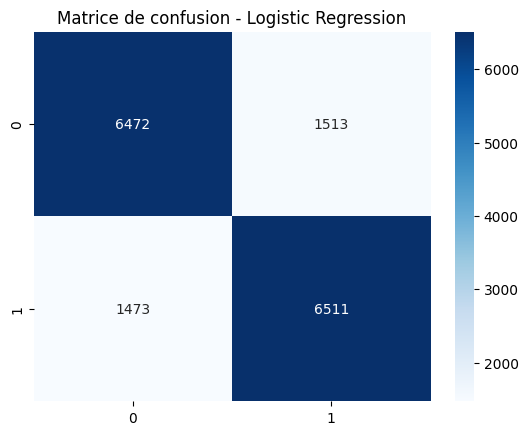

AUC-ROC : 0.8823


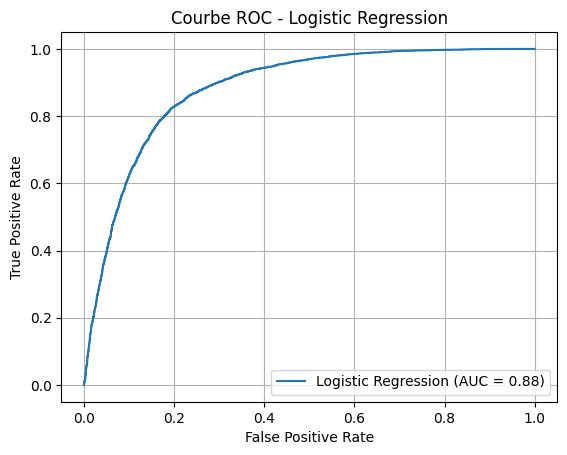

In [ ]:
# Logistic Regression
print("\nModèle : Logistic Regression")
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)
logistic_regression.fit(X_train, y_train)

# Predictions
y_pred_lr = logistic_regression.predict(X_test)
y_pred_proba_lr = logistic_regression.predict_proba(X_test)[:, 1]

# Classification report
print("Rapport de classification :")
print(classification_report(y_test, y_pred_lr))

# Confusion matrix
print("Matrice de confusion :")
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion - Logistic Regression")
plt.show()

# AUC-ROC score
auc_score_lr = roc_auc_score(y_test, y_pred_proba_lr)
print(f"AUC-ROC : {auc_score_lr:.4f}")

# ROC curve
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_proba_lr)
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_score_lr:.2f})")
plt.title("Courbe ROC - Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.grid()
plt.show()



## Explication du code
– On utilise la régression logistique pour créer un modèle qui prédit si un client va dire "oui" ou "non".  Après avoir entraîné le modèle, on l'utilise pour faire des prédictions sur un ensemble de test. Cela nous permet de voir comment le modèle se comporte sur des données qu'il n'a jamais vues. Les probabilités prédites permettent une évaluation plus précise des performances.

– On a ensuite généré un rapport qui fournit un aperçu détaillé de la performance du modèle pour chaque classe. Ce rapport inclut des mesures comme la précision (exactitude des prédictions) et le rappel (capacité à identifier les "oui"). Cela aide à comprendre la qualité des prédictions. Les métriques comme la précision, le rappel et le score F1 aident à comprendre les forces et les faiblesses du modèle.

– La matrice de confusion visualise les résultats mais surtout les erreurs de classification. Elle montre combien de prédictions étaient correctes et combien étaient incorrectes, en distinguant les "oui" et les "non". Cela aide à identifier si le modèle a tendance à mal classer certaines classes.

– L'AUC-ROC est une métrique robuste pour évaluer la performance des modèles de classification. Elle mesure la capacité du modèle à distinguer entre les classes "oui" et "non". Un score proche de 1 indique que le modèle est performant.

– On a finalement tracé la courbe ROC, qui montre le rapport entre les faux positifs et les vrais positifs à différents seuils de classification. Cela aide à visualiser la performance globale du modèle, afin de choisir un seuil optimal pour maximiser la performance.

## Interprétation des résultats
**1. Rapport de classification**

- Précision (Precision) :

 Classe 0 (non) : 0.81

 Classe 1 (oui) : 0.81

 Cela signifie que, parmi toutes les prédictions de "oui", 81 % étaient correctes, et parmi les prédictions de "non", 81 % étaient correctes. Le modèle est donc assez fiable pour les deux classes.
- Rappel (Recall) :

 Classe 0 : 0.81

 Classe 1 : 0.82

 Le rappel indique que le modèle a identifié 82 % des "oui" réels et 81 % des "non" réels. Cela montre que le modèle est efficace pour détecter les deux classes.
- F1-score :

 Classe 0 : 0.81

 Classe 1 : 0.81

 Le F1-score est une mesure qui combine la précision et le rappel. Un score autour de 0.81 pour les deux classes indique un bon équilibre entre précision et rappel.
- Exactitude (Accuracy) :

 0.81 (81 % des prédictions sont correctes)

 Cela signifie que le modèle a correctement prédit 81 % des résultats dans l'ensemble de test, ce qui est un bon score.

**2. Matrice de confusion**

Vrais positifs (TP) : 6511 (prédictions correctes de "oui").

Faux positifs (FP) : 1513 (prédictions incorrectes de "oui" pour des "non").

Faux négatifs (FN) : 1473 (prédictions incorrectes de "non" pour des "oui").

Vrais négatifs (TN) : 6472 (prédictions correctes de "non").

La matrice montre que le modèle a un nombre relativement équilibré de faux positifs et de faux négatifs, avec un léger avantage pour les vrais positifs. Cela indique que le modèle a tendance à prédire plus de "oui" que de "non" incorrectement, mais il réussit néanmoins à identifier un grand nombre de "oui".

**3. AUC-ROC Score**

AUC : 0.8823

Ce score indique que le modèle a une bonne capacité à distinguer entre les classes "oui" et "non". Un AUC de 0.88 est considéré comme très bon, car il est proche de 1. Cela signifie que le modèle est capable de classer correctement la plupart des exemples.

**4. Courbe ROC**

La courbe ROC montre une très bonne performance du modèle, la courbe se situe presque dans le coin supérieur gauche du graphique. Cela indique que le modèle a un faible taux de faux positifs tout en ayant un bon taux de vrais positifs.

**Conclusion**

La régression logistique a bien fonctionné sur cet ensemble de données, avec une précision, un rappel et un F1-score élevés pour les deux classes. La matrice de confusion montre un bon équilibre entre les prédictions correctes et incorrectes, et le score AUC-ROC indique que le modèle a une excellente capacité de différenciation entre les classes. Donc ce modèle peut être utilisé de manière fiable pour faire des prédictions.


Modèle : Random Forest
Rapport de classification :
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      7985
           1       0.94      0.97      0.95      7984

    accuracy                           0.95     15969
   macro avg       0.95      0.95      0.95     15969
weighted avg       0.95      0.95      0.95     15969

Matrice de confusion :


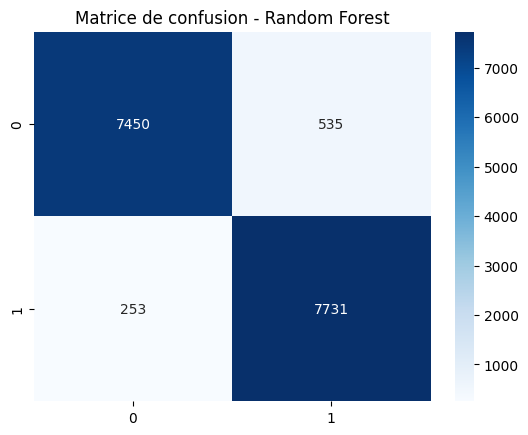

AUC-ROC : 0.9910


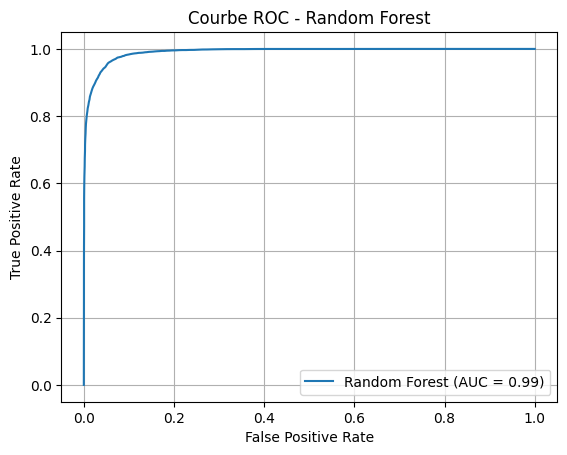

In [ ]:
# Random Forest
print("\nModèle : Random Forest")
random_forest = RandomForestClassifier(random_state=42, n_estimators=100)
random_forest.fit(X_train, y_train)

# Predictions
y_pred_rf = random_forest.predict(X_test)
y_pred_proba_rf = random_forest.predict_proba(X_test)[:, 1]

# Classification report
print("Rapport de classification :")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
print("Matrice de confusion :")
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion - Random Forest")
plt.show()

# AUC-ROC score
auc_score_rf = roc_auc_score(y_test, y_pred_proba_rf)
print(f"AUC-ROC : {auc_score_rf:.4f}")

# ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_score_rf:.2f})")
plt.title("Courbe ROC - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.grid()
plt.show()


## Explication du code
– On fait l'entraînement avec le modèle Random Forest Classifier. Ce modèle permet de créer un ensemble d'arbres de décision qui améliorent la robustesse et la précision des prédictions. En combinant plusieurs arbres, le modèle réduit le risque de surajustement, ce qui est courant avec un seul arbre. Chaque arbre est construit sur un échantillon aléatoire des données, et la décision finale est prise par vote majoritaire. Cette approche réduit le risque de surajustement et permet d’obtenir un modèle plus stable et performant, même sur des données bruitées ou déséquilibrées.

– La suite du code est le même que pour le modèle de régression logistique. On fait le rapport de classification, puis la matrice de confusion, on calcule l'AUC-ROC et on trace la courbe ROC.

– Ces étapes permettent d'évaluer et de visualiser la performance du modèle Random Forest de manière complète, en mettant l'accent sur la robustesse de ce modèle par rapport à des approches plus simples. Random Forest est souvent préféré pour sa capacité à gérer des relations complexes dans les données et à offrir une meilleure généralisation.


## Interprétation des résultats
**1. Rapport de classification**

- Précision :

 Classe 0 (non) : 0.97

 Classe 1 (oui) : 0.94

 Cela signifie que, parmi toutes les prédictions de "non", 97 % étaient correctes, et parmi les prédictions de "oui", 94 % l'étaient également. Le modèle est donc très précis dans ses prédictions.

- Rappel :

 Classe 0 : 0.93

 Classe 1 : 0.97

 Le rappel indique que le modèle a identifié 97 % des "oui" réels et 93 % des "non" réels. Cela montre une bonne capacité à détecter les deux classes.
F1-score :
Classe 0 : 0.95
Classe 1 : 0.95
L’équilibre des scores F1 pour les deux classes indique que le modèle réussit à maintenir un bon compromis entre précision et rappel.

- Exactitude (Accuracy) :
 0.95 (95 % des prédictions sont correctes)
 Cela indique une excellente performance globale du modèle.

**2. Matrice de confusion**

Vrais positifs (TP) : 7731 (prédictions correctes de "oui").

Faux positifs (FP) : 535 (prédictions incorrectes de "oui" pour des "non").

Faux négatifs (FN) : 253 (prédictions incorrectes de "non" pour des "oui").

Vrais négatifs (TN) : 7450 (prédictions correctes de "non").

La matrice de confusion montre un modèle qui a très peu de faux négatifs et de faux positifs, ce qui est un excellent signe. La majorité des prédictions sont correctes, et le modèle a une bonne capacité à identifier les deux classes.

**3. AUC-ROC Score**

AUC : 0.9910

Ce score indique que le modèle a une capacité exceptionnelle à distinguer entre les classes "oui" et "non". Un AUC proche de 1 indique une performance presque parfaite.

**4. Courbe ROC**

La courbe ROC montre une très bonne performance du modèle, se rapprochant de l'angle supérieur gauche du graphique. Cela signifie que le modèle maintient un faible taux de faux positifs tout en maximisant le taux de vrais positifs.

**Conclusion**

Dans l'ensemble, le modèle Random Forest a montré des performances remarquables avec une précision, un rappel et un F1-score élevés pour les deux classes. La matrice de confusion indique que le modèle a fait très peu d'erreurs de classification. L'AUC-ROC proche de 1 renforce l'idée que le modèle est capable de bien discriminer entre les classes. Ces résultats suggèrent que ce modèle est très fiable et pourrait être utilisé efficacement.


Modèle : K-Nearest Neighbors
Rapport de classification :
              precision    recall  f1-score   support

           0       0.99      0.84      0.91      7985
           1       0.86      0.99      0.92      7984

    accuracy                           0.92     15969
   macro avg       0.93      0.92      0.92     15969
weighted avg       0.93      0.92      0.92     15969

Matrice de confusion :


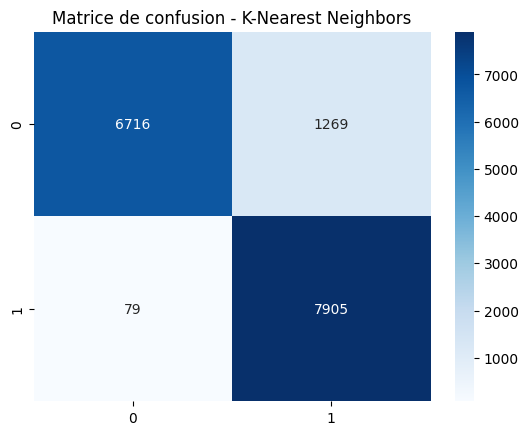

AUC-ROC : 0.9634


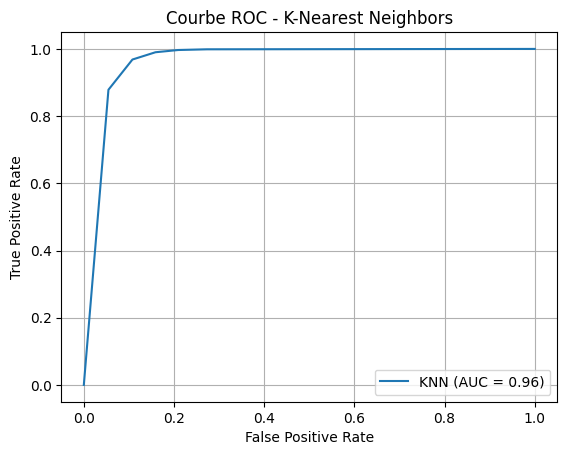

In [ ]:
# K-Nearest Neighbors
print("\nModèle : K-Nearest Neighbors")
knn = KNeighborsClassifier(n_neighbors=5)  # Vous pouvez ajuster n_neighbors selon vos besoins
knn.fit(X_train, y_train)

# Predictions
y_pred_knn = knn.predict(X_test)
y_pred_proba_knn = knn.predict_proba(X_test)[:, 1]

# Classification report
print("Rapport de classification :")
print(classification_report(y_test, y_pred_knn))

# Confusion matrix
print("Matrice de confusion :")
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion - K-Nearest Neighbors")
plt.show()

# AUC-ROC score
auc_score_knn = roc_auc_score(y_test, y_pred_proba_knn)
print(f"AUC-ROC : {auc_score_knn:.4f}")

# ROC curve
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_proba_knn)
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {auc_score_knn:.2f})")
plt.title("Courbe ROC - K-Nearest Neighbors")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.grid()
plt.show()

## Explication du code
– Entraînement avec le modèle K-Nearest Neighbors : Le modèle KNN est un algorithme de classification basé sur la proximité. Lors de l'entraînement, il n'y a pas de phase explicite de création de modèle comme avec les arbres de décision. KNN mémorise simplement l'ensemble des données d'entraînement. Lorsqu'une nouvelle instance doit être classée, le modèle recherche les k voisins les plus proches dans l’espace des caractéristiques, en utilisant une mesure de distance (généralement la distance euclidienne). La classe de la nouvelle instance est déterminée par un vote majoritaire parmi ces voisins.

– Réglage de k : Le choix du nombre de voisins k est important. Un k trop petit peut rendre le modèle sensible au bruit, tandis qu'un k trop grand peut réduire la capacité du modèle à capturer les structures locales des données. Donc il est souvent utile d'expérimenter avec différentes valeurs de k pour trouver celle qui offre les meilleures performances.

– Évaluation du modèle : Comme pour le modèle de régression logistique et le Random Forest, la suite du code inclut le rapport de classification, la matrice de confusion, le calcul de l'AUC-ROC et le tracé de la courbe ROC. Ces étapes permettent d'évaluer la performance du modèle KNN de manière complète.

– Performance et Robustesse : Bien que KNN soit simple et efficace pour des ensembles de données de petite à moyenne taille, il peut devenir moins performant avec de grandes quantités de données ou des dimensions élevées, car il nécessite le calcul des distances pour chaque instance. Toutefois, il reste un choix populaire pour des problèmes de classification simples, en raison de sa facilité d'utilisation et de sa capacité à s'adapter à des distributions de données variées.

Conclusion

KNN est un modèle efficace pour les problèmes de classification, surtout lorsqu'il est bien configuré. Son approche basée sur la proximité est intuitive et peut offrir de bonnes performances, mais il est important de prêter attention à la sélection du bon paramètre k et à la gestion de la complexité des données.

## Interprétation des résultats

**1. Rapport de Classification**

- Précision (Precision) :

 Classe 0 : 0.99

 Classe 1 : 0.86

 Cela signifie que lorsque le modèle prédit la classe 1, il est correct 86 % du temps, tandis qu'il est très précis pour la classe 0 avec 99 % de précision.

- Rappel (Recall) :

 Classe 0 : 0.84

 Classe 1 : 0.99

 Le rappel indique que le modèle identifie 99 % des instances de la classe 1, mais seulement 84 % des instances de la classe 0.

- F1-Score :

 Classe 0 : 0.91

 Classe 1 : 0.92

 Le F1-score est une mesure harmonique qui prend en compte à la fois la précision et le rappel. Les scores sont relativement élevés, indiquant un bon équilibre entre précision et rappel.

- Exactitude (Accuracy) : 0.92

 Cela signifie que 92 % des prédictions du modèle étaient correctes.

**2. Matrice de Confusion**

Vrais positifs (TP) : 7905 (prédictions correctes de "oui").

Faux positifs (FP) : 1269 (prédictions incorrectes de "oui" pour des "non").

Faux négatifs (FN) : 69 (prédictions incorrectes de "non" pour des "oui").

Vrais négatifs (TN) : 6716 (prédictions correctes de "non").

Le modèle KNN montre une excellente performance avec un nombre élevé de Vrais Positifs et Vrais Négatifs, et un faible nombre de Faux Négatifs. Cependant, le nombre de Faux Positifs est significatif, ce qui pourrait nécessiter une attention particulière, notamment pour réduire les faux positifs et améliorer la précision globale pour la classe négative. Globalement, KNN apparaît comme un modèle robuste, mais des optimisations peuvent être envisagées pour améliorer ses performances.

**3. AUC-ROC Score**

AUC : 0.9634

Ce score indique que le modèle a une capacité exceptionnelle à distinguer entre les classes "oui" et "non". La valeur AUC (Area Under the Curve) est proche de 1, ce qui indique que le modèle a une excellente capacité à distinguer entre les classes.

**4. Courbe ROC**

La courbe ROC montre que le modèle maintient un taux de vrais positifs élevé tout en ayant un faible taux de faux positifs, ce qui est idéal.

**5. Conclusion**

Les résultats montrent que le modèle KNN est très performant pour ce jeu de données, avec une bonne précision, un excellent rappel pour la classe 1, et une AUC élevée. Cependant, le modèle pourrait bénéficier d'une optimisation pour réduire le nombre de faux positifs pour la classe 0. En résumé, KNN semble être un bon choix pour cette tâche de classification, mais des ajustements pourraient encore améliorer ses performances, notamment en explorant différentes valeurs de k.


Modèle : XGBoost
Rapport de classification :
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      7985
           1       0.95      0.94      0.95      7984

    accuracy                           0.95     15969
   macro avg       0.95      0.95      0.95     15969
weighted avg       0.95      0.95      0.95     15969

Matrice de confusion :


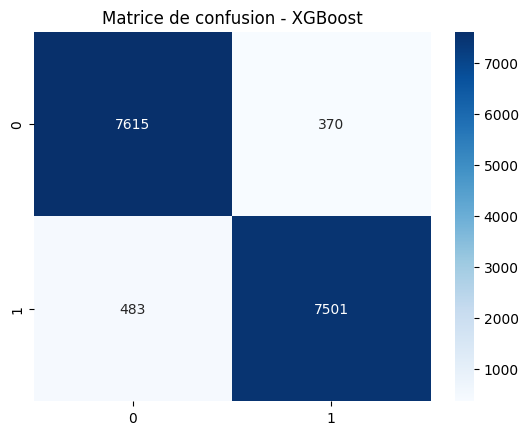

AUC-ROC : 0.9907


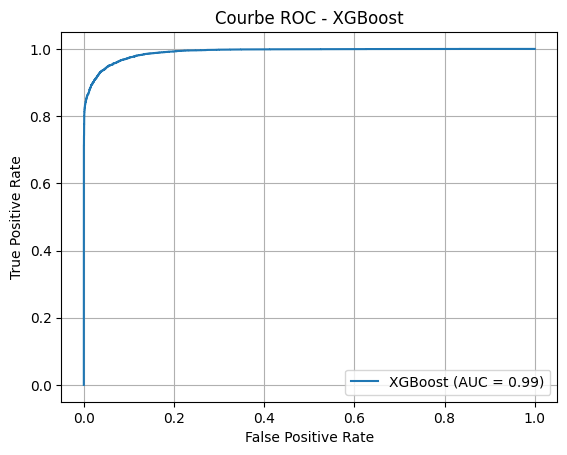

In [ ]:
# XGBoost
print("\nModèle : XGBoost")
xgboost_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgboost_model.fit(X_train, y_train)

# Prédictions
y_pred_xgb = xgboost_model.predict(X_test)
y_pred_proba_xgb = xgboost_model.predict_proba(X_test)[:, 1]

# Rapport de classification
print("Rapport de classification :")
print(classification_report(y_test, y_pred_xgb))

# Matrice de confusion
print("Matrice de confusion :")
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion - XGBoost")
plt.show()

# AUC-ROC score
auc_score_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
print(f"AUC-ROC : {auc_score_xgb:.4f}")

# Courbe ROC
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_proba_xgb)
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {auc_score_xgb:.2f})")
plt.title("Courbe ROC - XGBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.grid()
plt.show()

## Explication du code

– Le modèle XGBoost (Extreme Gradient Boosting) est une technique de boosting d'arbres de décision qui optimise la performance et la vitesse d'apprentissage. Contrairement à Random Forest, qui construit un ensemble d'arbres de manière indépendante, XGBoost construit les arbres de manière séquentielle, chaque nouvel arbre corrige les erreurs des arbres précédents. Cela permet d'obtenir des prédictions plus précises, surtout lorsque les données présentent des relations complexes.

XGBoost inclut des mécanismes de régularisation (L1 et L2) pour éviter le surajustement. Cela est particulièrement utile lorsque les données sont bruitées ou lorsqu'il y a un grand nombre de caractéristiques.

– Après l'entraînement du modèle, le code effectue des prédictions sur l'ensemble de test. Cela inclut le calcul du rapport de classification, qui fournit des métriques comme la précision, le rappel et le score F1. La matrice de confusion est ensuite tracée pour visualiser les véritables positifs, véritables négatifs, faux positifs et faux négatifs.

– L'AUC-ROC est calculée pour évaluer la capacité du modèle à distinguer entre les classes. La courbe ROC est tracée pour visualiser le compromis entre le taux de vrais positifs et le taux de faux positifs à différents seuils de classification. Cela permet d'évaluer la performance du modèle dans différentes situations.

## Interprétation des résultats

**1. Rapport de Classification**

- Précision (Precision) :

 Classe 0 : 0.94

 Classe 1 : 0.95

 Cela signifie que lorsque le modèle prédit la classe 1 (souscripteur), il est correct 95 % du temps, et il a également une très haute précision pour la classe 0 (non-souscripteur) avec 94 %.

- Rappel (Recall) :

 Classe 0 : 0.95

 Classe 1 : 0.94

 Le rappel indique que le modèle identifie 94 % des instances de la classe 1, tandis qu'il identifie 95 % des instances de la classe 0. Cela montre que le modèle est capable de détecter presque toutes les instances de chaque classe.

- F1-Score :

 Classe 0 : 0.95

 Classe 1 : 0.95

 Le F1-score, qui représente un équilibre entre précision et rappel, est élevé pour les deux classes, indiquant que le modèle maintient une bonne performance globale.

- Exactitude (Accuracy) : 0.95

 Cela signifie que 95 % des prédictions du modèle étaient correctes, ce qui est un excellent résultat.

**2. Matrice de Confusion**

Vrais Positifs (TP) : 7501 (prédictions correctes de "oui").

Faux Positifs (FP) : 370 (prédictions incorrectes de "oui" pour des "non").

Faux Négatifs (FN) : 483 (prédictions incorrectes de "non" pour des "oui").

Vrais Négatifs (TN) : 7615 (prédictions correctes de "non").

Le modèle XGBoost montre une excellente performance avec un nombre élevé de Vrais Positifs et de Vrais Négatifs. Cependant, le nombre de Faux Négatifs est significatif, ce qui indique que le modèle a parfois du mal à identifier certains souscripteurs. Les Faux Positifs, bien que présents, sont relativement faibles par rapport au nombre total de prédictions.

**3. AUC-ROC Score**

AUC : 0.9907

Ce score indique que le modèle a une capacité exceptionnelle à distinguer entre les classes "oui" (souscripteur) et "non" (non-souscripteur). Une valeur AUC proche de 1 reflète une excellente capacité de différenciation.

**4. Courbe ROC**

La courbe ROC montre une performance robuste du modèle, avec un taux de vrais positifs élevé et un faible taux de faux positifs. Cela indique que le modèle est efficace pour maintenir un bon équilibre entre les différentes classes à travers divers seuils de classification.

**5. Conclusion**

Les résultats montrent que le modèle XGBoost est très performant pour ce jeu de données, avec des précisions et des rappels élevés pour les deux classes, ainsi qu'une AUC exceptionnelle. Cependant, le nombre relativement élevé de faux négatifs pour la classe 1 peut nécessiter des ajustements pour améliorer la détection des souscripteurs. Donc XGBoost est un excellent choix pour cette tâche de classification, mais des optimisations pourraient encore améliorer ses performances, notamment en ajustant des hyperparamètres ou en explorant des techniques de rééchantillonnage pour mieux gérer les classes.


Modèle : Support Vector Machine
Rapport de classification :
              precision    recall  f1-score   support

           0       0.89      0.82      0.86      7985
           1       0.83      0.90      0.87      7984

    accuracy                           0.86     15969
   macro avg       0.86      0.86      0.86     15969
weighted avg       0.86      0.86      0.86     15969

Matrice de confusion :


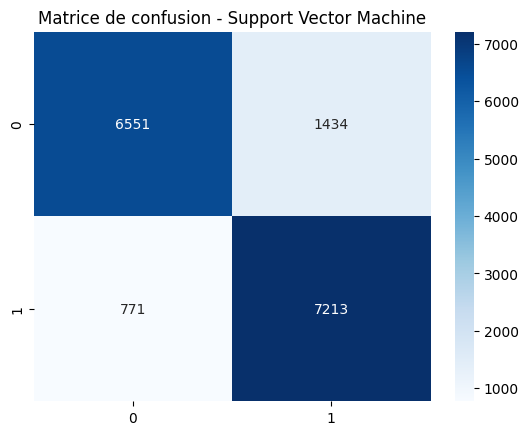

AUC-ROC : 0.9286


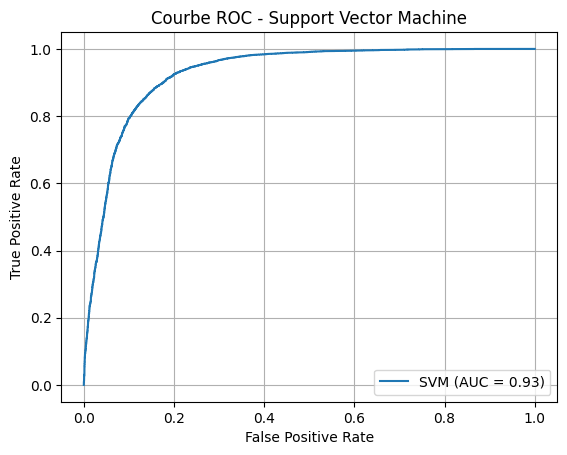

In [ ]:
# Support Vector Machine
print("\nModèle : Support Vector Machine")
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Prédictions
y_pred_svm = svm_model.predict(X_test)
y_pred_proba_svm = svm_model.predict_proba(X_test)[:, 1]

# Rapport de classification
print("Rapport de classification :")
print(classification_report(y_test, y_pred_svm))

# Matrice de confusion
print("Matrice de confusion :")
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion - Support Vector Machine")
plt.show()

# AUC-ROC score
auc_score_svm = roc_auc_score(y_test, y_pred_proba_svm)
print(f"AUC-ROC : {auc_score_svm:.4f}")

# Courbe ROC
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_proba_svm)
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {auc_score_svm:.2f})")
plt.title("Courbe ROC - Support Vector Machine")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.grid()
plt.show()

## Explication du code

– On commence par entraîner le modèle Support Vector Machine (SVM) en utilisant la classe SVC de la bibliothèque scikit-learn. Le SVM est un classificateur puissant qui cherche à trouver l'hyperplan optimal qui sépare les différentes classes dans l'espace des caractéristiques. En utilisant la méthode des marges maximales, le SVM tente de maximiser la distance entre les points de données des classes différentes, ce qui contribue à une meilleure généralisation.

– Le paramètre probability=True permet de calculer les probabilités de classe lors de la prédiction, ce qui est nécessaire pour évaluer l'AUC-ROC. Le modèle est ensuite ajusté (ou "fit") sur les données d'entraînement (X_train, y_train).

– Après l'entraînement, le modèle prédit les classes pour les données de test (X_test) et calcule aussi les probabilités associées pour la classe positive.

– Les étapes suivantes sont identiques à celles utilisées pour les autres modèles, comme le rapport de classification qui fournit des métriques telles que la précision, le rappel et le F1-score. Cela donne une vue d'ensemble des performances du modèle.

– La matrice de confusion est ensuite visualisée à l'aide de seaborn, ce qui permet d'identifier les vrais positifs, faux positifs, vrais négatifs et faux négatifs, offrant ainsi un aperçu des erreurs de classification.

– On calcule également l'AUC-ROC, qui mesure la capacité du modèle à distinguer entre les classes. Une valeur AUC proche de 1 indique une excellente performance.Finalement, on trace la courbe ROC qui représente le taux de vrais positifs par rapport au taux de faux positifs, ce qui permet d'évaluer la performance du modèle à différents seuils de classification.

## Interprétation des résultats

**1. Rapport de Classification**

- Précision (Precision) :

 Classe 0 : 0.89

 Classe 1 : 0.83

 Cela signifie que lorsque le modèle prédit la classe 1 (souscripteur), il est correct 83 % du temps, et pour la classe 0 (non-souscripteur), il est correct 89 % du temps. Cela montre une bonne précision, bien que la précision pour la classe 1 soit légèrement inférieure.

- Rappel (Recall) :

 Classe 0 : 0.82

 Classe 1 : 0.90

 Le rappel indique que le modèle identifie 90 % des instances de la classe 1 et 82 % des instances de la classe 0. Cela montre que le modèle est capable de détecter presque toutes les instances de chaque classe, avec un léger avantage pour la classe 1.

- F1-Score :

 Classe 0 : 0.86

 Classe 1 : 0.87

 Le F1-score, qui représente un équilibre entre précision et rappel, est élevé pour les deux classes, indiquant une bonne performance globale du modèle.

- Exactitude (Accuracy) : 0.86

 Cela signifie que 86 % des prédictions du modèle étaient correctes, ce qui est un résultat satisfaisant.

**2. Matrice de Confusion**

Vrais Positifs (TP) : 7213 (prédictions correctes de "oui").

Faux Positifs (FP) : 1434 (prédictions incorrectes de "oui" pour des "non").

Faux Négatifs (FN) : 771 (prédictions incorrectes de "non" pour des "oui").

Vrais Négatifs (TN) : 6551 (prédictions correctes de "non").

Le modèle SVM présente de bons résultats avec un nombre élevé de Vrais Positifs et de Vrais Négatifs. Cependant, le nombre de Faux Positifs est relativement élevé, ce qui indique que le modèle a tendance à prédire des souscripteurs là où il n'y en a pas. Les Faux Négatifs sont également significatifs, bien que moins nombreux, ce qui suggère que le modèle pourrait parfois manquer des souscripteurs.

**3. AUC-ROC Score**

AUC : 0.9286

Ce score indique que le modèle a une capacité excellente à distinguer entre les classes "oui" (souscripteur) et "non" (non-souscripteur). Une valeur AUC proche de 1 reflète une très bonne capacité de discrimination.

**4. Courbe ROC**

La courbe ROC montre une performance robuste du modèle, avec un taux de vrais positifs élevé et un faible taux de faux positifs. Cela indique que le modèle est efficace pour maintenir un bon équilibre entre les différentes classes à travers divers seuils de classification.

**5. Conclusion**

Les résultats montrent que le modèle SVM est performant pour ce jeu de données, avec des précisions et des rappels élevés pour les deux classes, ainsi qu'une AUC de 0.93, indiquant une excellente capacité de différenciation. Mais le nombre relativement élevé de faux positifs pour la classe 0 pourrait nécessiter des ajustements pour améliorer la précision des prédictions de cette classe. Donc le SVM est un bon choix pour cette classification, mais des améliorations, comme l'ajustement des hyperparamètres ou l'exploration de techniques de rééchantillonnage, pourraient encore améliorer ses performances.

In [ ]:
print("\nModèle : Decision Tree")
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)


Modèle : Decision Tree


DecisionTreeClassifier(random_state=42)

Rapport de classification :
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      7985
           1       0.91      0.92      0.91      7984

    accuracy                           0.91     15969
   macro avg       0.91      0.91      0.91     15969
weighted avg       0.91      0.91      0.91     15969

Matrice de confusion :


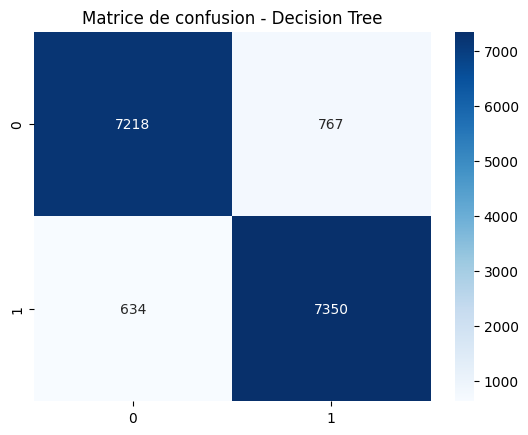

AUC-ROC : 0.9123


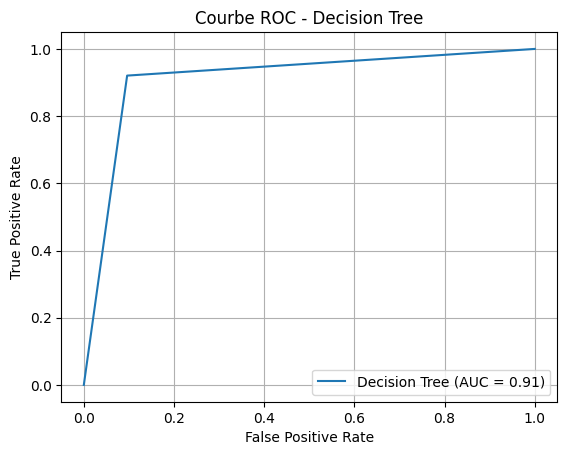

In [ ]:
# Prédictions
y_pred_dt = decision_tree.predict(X_test)
y_pred_proba_dt = decision_tree.predict_proba(X_test)[:, 1]

# Rapport de classification
print("Rapport de classification :")
print(classification_report(y_test, y_pred_dt))

# Matrice de confusion
print("Matrice de confusion :")
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion - Decision Tree")
plt.show()

# AUC-ROC score
auc_score_dt = roc_auc_score(y_test, y_pred_proba_dt)
print(f"AUC-ROC : {auc_score_dt:.4f}")

# Courbe ROC
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt)
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc_score_dt:.2f})")
plt.title("Courbe ROC - Decision Tree")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.grid()
plt.show()

## Explication du code

– L'arbre de décision est un modèle de prédiction qui divise les données en sous-groupes basés sur les attributs. Chaque nœud de l'arbre représente une question sur une caractéristique, et chaque feuille représente une décision ou un résultat final. L'arbre est construit de manière à minimiser l'impureté des décisions, souvent mesurée par des critères comme l'entropie ou le gain d'information.

– Contrairement à des modèles plus complexes, un arbre de décision est facilement interprétable, car il présente un arbre clair. Mais un seul arbre peut être sujet au surajustement, surtout s'il est trop profond.

– Le code continue avec les mêmes étapes d'évaluation que les autres modèles. Après avoir entraîné l'arbre de décision sur l'ensemble d'entraînement, nous faisons des prédictions sur l'ensemble de test. Le rapport de classification, qui fournit des métriques telles que la précision, le rappel et le score F1, permet d'évaluer la performance du modèle.

– La matrice de confusion est affichée pour visualiser les performances du modèle en termes de vraies et fausses classes.

– AUC-ROC : Le score AUC-ROC est calculé pour évaluer la capacité du modèle à distinguer entre les classes positives et négatives. Une courbe ROC est tracée, montrant le compromis entre le taux de vrais positifs et le taux de faux positifs à différents seuils.

## Interprétation des résultats

**1. Rapport de Classification**

- Précision (Precision) :

 Classe 0 : 0.92

 Classe 1 : 0.91

 La précision indique que, parmi toutes les instances prédîtes comme positives (classe 1), 91 % étaient effectivement correctes. Cela montre une bonne performance dans la classification des deux classes.

- Rappel (Recall) :

 Classe 0 : 0.90

 Classe 1 : 0.92

 Le rappel mesure la capacité du modèle à identifier correctement les instances positives. Ici, le modèle a identifié 92 % des véritables positives (classe 1). Le rappel est également élevé pour la classe 0, montrant que le modèle est efficace pour détecter les deux classes.

- F1-Score :

 Classe 0 : 0.91

 Classe 1 : 0.91

 Le F1-score est la moyenne harmonique de la précision et du rappel. Avec des scores de 0.91 pour les deux classes, cela indique un bon équilibre entre la précision et le rappel.


- Exactitude (Accuracy) : 0.91

 L'accuracy de 91 % indique que le modèle a correctement classé 91 % des instances dans l'ensemble de test, ce qui est un excellent résultat.

**2. Matrice de Confusion**

Vrais Négatifs (TN) : 7218 (prédictions correctes de "non").

Faux Positifs (FP) : 767 (prédictions incorrectes de "oui" pour des "non").

Faux Négatifs (FN) : 634 (prédictions incorrectes de "non" pour des "oui").

Vrais Positifs (TP) : 7350 (prédictions correctes de "oui").

Cette matrice montre que le modèle a fait quelques erreurs, mais dans l'ensemble, il a bien performé, surtout pour la classe 1, avec un nombre élevé de vrais positifs.

**3. AUC-ROC Score**

AUC-ROC : 0.9123

Une AUC de 0.91 indique que le modèle a une bonne capacité à distinguer entre les classes positives et négatives. Plus l'AUC est proche de 1, meilleure est la performance du modèle.

**4. Courbe ROC**

La courbe ROC montre que le modèle maintient un bon taux de vrais positifs tout en maintenant un faible taux de faux positifs, ce qui est bien.

**5. Conclusion**

Le modèle d'Arbre de Décision a montré des bons résultats avec une précision, un rappel et un F1-score élevés pour les deux classes. La matrice de confusion révèle que, bien que le modèle ait commis quelques erreurs de classification, il a globalement bien fonctionné. L'AUC-ROC souligne la capacité du modèle à discriminer efficacement entre les classes. Cela fait de l'Arbre de Décision une approche efficace pour le problème de classification en question.


Modèle : Naive Bayes
Rapport de classification :
              precision    recall  f1-score   support

           0       0.82      0.63      0.71      7985
           1       0.70      0.86      0.77      7984

    accuracy                           0.75     15969
   macro avg       0.76      0.75      0.74     15969
weighted avg       0.76      0.75      0.74     15969

Matrice de confusion :


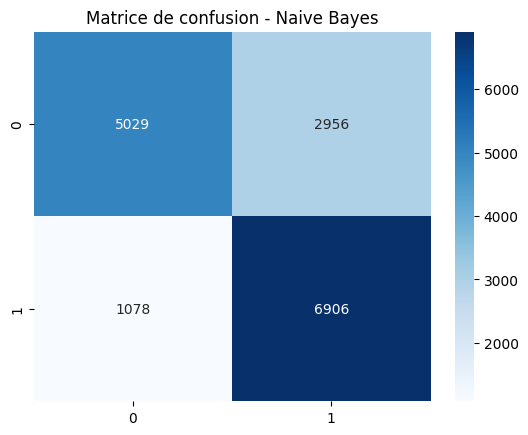

AUC-ROC : 0.8237


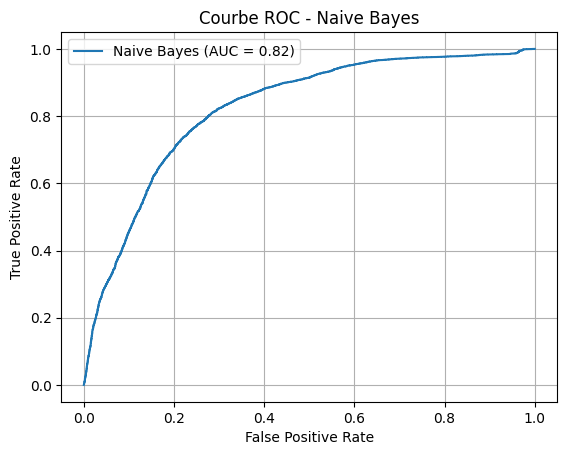

In [ ]:
# Modèle : Naive Bayes
print("\nModèle : Naive Bayes")
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# Prédictions
y_pred_nb = naive_bayes.predict(X_test)
y_pred_proba_nb = naive_bayes.predict_proba(X_test)[:, 1]

# Rapport de classification
print("Rapport de classification :")
print(classification_report(y_test, y_pred_nb))

# Matrice de confusion
print("Matrice de confusion :")
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion - Naive Bayes")
plt.show()

# AUC-ROC score
auc_score_nb = roc_auc_score(y_test, y_pred_proba_nb)
print(f"AUC-ROC : {auc_score_nb:.4f}")

# Courbe ROC
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred_proba_nb)
plt.plot(fpr_nb, tpr_nb, label=f"Naive Bayes (AUC = {auc_score_nb:.2f})")
plt.title("Courbe ROC - Naive Bayes")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.grid()
plt.show()

## Explication du code

– Le modèle de classification naïve bayésienne est un classificateur probabiliste basé sur le théorème de Bayes, qui suppose que les caractéristiques sont indépendantes les unes des autres. Dans le cas de GaussianNB, il est supposé que les caractéristiques suivent une distribution normale. Ce modèle est particulièrement efficace pour des ensembles de données où les caractéristiques sont continues.

– Indépendance des caractéristiques : Le modèle évalue la probabilité que chaque classe soit associée à chaque observation en supposant que les caractéristiques sont indépendantes. Cela simplifie le calcul des probabilités conditionnelles, rendant le modèle à la fois rapide et efficace.

– Pour chaque classe, le modèle calcule la probabilité que chaque caractéristique prenne une certaine valeur, et utilise ces probabilités pour prédire la classe la plus probable pour une nouvelle observation. La classe prédite est celle qui a la plus haute probabilité, calculée en multipliant les probabilités de chaque caractéristique pour la classe considérée.

– Après l'entraînement du modèle, le code effectue des prédictions sur l'ensemble de test. Cela inclut le calcul du rapport de classification, qui fournit des métriques comme la précision, le rappel et le score F1. La matrice de confusion est ensuite tracée pour visualiser les véritables positifs, véritables négatifs, faux positifs et faux négatifs.

– L'AUC-ROC est calculée pour évaluer la capacité du modèle à distinguer entre les classes. La courbe ROC est tracée pour visualiser le compromis entre le taux de vrais positifs et le taux de faux positifs à différents seuils de classification. Cela permet d'évaluer la performance du modèle dans différentes situations.

Conclusion
Le modèle de classification naïve bayésienne est léger et rapide, ce qui le rend adapté aux situations où la rapidité de prédiction est essentielle. Il est particulièrement utile pour les problèmes de classification avec des ensembles de données de grande taille et lorsque les caractéristiques sont indépendantes.

## Interprétation des résultats

**1. Rapport de Classification**

- Précision (Precision) :

 Classe 0 : 0.82

 Classe 1 : 0.70

 La précision indique la proportion de vraies classifications positives parmi toutes les prédictions positives. Pour la classe 0, 82% des prédictions sont correctes, tandis que pour la classe 1, 70% le sont. Cela montre que le modèle est assez précis pour prédire la classe 0.

- Rappel (Recall) :

 Classe 0 : 0.63

 Classe 1 : 0.86

 Le rappel mesure la capacité du modèle à identifier toutes les instances positives. Ici, le modèle a un meilleur rappel pour la classe 1 (86%), ce qui signifie qu'il identifie bien les cas réels de cette classe, mais il n’identifie que 63% des cas de la classe 0.

- F1-Score :

 Classe 0 : 0.71

 Classe 1 : 0.77

 Le F1-score est la moyenne harmonique de la précision et du rappel. Il est plus élevé pour la classe 1, indiquant que le modèle est plus performant pour cette classe.

- Exactitude (Accuracy) : 0.75

 Le modèle naïf bayésien a correctement prédit 75 % des exemples dans l'ensemble de données, ce qui est un bon indicateur de performance, bien que cela suggère également qu'il y a une marge d'amélioration, surtout en ce qui concerne la prédiction des classes moins représentées.

**2. Matrice de Confusion**

Vrais Positifs (TP) : 6906 (prédictions correctes de "oui").

Faux Positifs (FP) : 2956 (prédictions incorrectes de "oui" pour des "non").

Vrais Négatifs (TN) : 5029 (prédictions correctes de "non").

Faux Négatifs (FN) : 1078 (prédictions incorrectes de "non" pour des "oui").

Le modèle semble avoir des difficultés à prédire la classe 0, comme le montre le nombre élevé de faux positifs (2956). Cela peut indiquer un déséquilibre dans le modèle, peut-être dû à la plus grande taille de la classe 1.

**3. AUC-ROC**

AUC : 0.8237

Une AUC de 0.82 indique que le modèle a une bonne capacité à distinguer entre les classes. Une valeur proche de 1 suggère que le modèle est performant dans sa capacité à identifier les classes positives et négatives.

**4. Courbe ROC**

La courbe ROC montre que le modèle maintient un bon taux de vrais positifs tout en gardant un faible taux de faux positifs. Cela indique une bonne performance du modèle dans la classification.

**5. Conclusion**

Le modèle naïf bayésien montre des performances globalement positives, en particulier dans l'identification de la classe 1. Cependant, il présente des défis pour prédire la classe 0, comme l'indiquent la précision et le rappel inférieurs pour cette classe. L'AUC-ROC indique que le modèle est capable de faire des distinctions utiles entre les classes, mais des ajustements supplémentaires et une exploration des techniques de traitement des données déséquilibrées pourraient améliorer les performances, notamment pour la classe moins représentée (classe 0).

## Conclusion

Nous avons exploré plusieurs algorithmes de classification pour résoudre un problème de classification. Les modèles utilisés incluent le Logistic Regression, Random Forest, K-Nearest Neighbors, XGBoost, Support Vector Machine, Arbre de Décision et Naive Bayes. Chacun de ces modèles a été évalué à l'aide de métriques pertinentes telles que la précision, le rappel, le F1-score, l'exactitude et l'AUC-ROC, ce qui nous a permis d'obtenir une vision claire de leur performance.

Parmi les modèles testés, XGBoost s'est distingué par ses performances exceptionnelles, affichant une AUC-ROC élevée et des scores de précision et de rappel équilibrés. Le K-Nearest Neighbors et le Support Vector Machine ont également montré de bonnes performances, avec des résultats solides en termes de précision et de rappel. L'Arbre de Décision a permis une compréhension facile de ses décisions et a de bonnes performances. Bien que le Naive Bayes ait fourni des résultats acceptables, il a montré certaines limitations, notamment dans la classification de la classe 0.

Dans l'ensemble, tous les modèles évalués se sont avérés efficaces pour cette tâche de classification, chacun ayant ses propres avantages et inconvénients. Cela souligne l'importance d'essayer plusieurs approches pour trouver la solution la plus adaptée à un problème donné.


Il existe de nombreux autres modèles et techniques de classification que nous n'avons pas explorés dans ce projet, tels que les réseaux de neurones ou des modèles avancés. Ces approches pourraient potentiellement améliorer encore les performances. L'expérimentation avec différents modèles et l'optimisation des hyperparamètres pourraient améliorer notre solution.